# Time Series Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Air Pollution in the United States

### **Explonatory Data Analysis**

In [126]:
# loading python libraries for analysis
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
# reading data from the dataframe
df = pd.read_csv('/content/uspollution_pollution_us_2000_2016.csv')
df.head(3)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [115]:
# deleted index unnamed column using iloc method
df = df.iloc[: , 1:]
df.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [ ]:
df = df.iloc[:50000 , :]

In [116]:
df.shape

(1746661, 28)

In [117]:
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [118]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [119]:
# data has been described
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [120]:
#displaying information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value  

In [121]:
'''
State Distribution (Classification Only)
#####################################################################################################

'''
class_count=df.groupby('State').size()
print (class_count)

State
Alabama                   3126
Alaska                    1974
Arizona                  69840
Arkansas                 35332
California              576142
Colorado                 35188
Connecticut              29933
Country Of Mexico         9506
Delaware                  3630
District Of Columbia     25696
Florida                  25918
Georgia                   7722
Hawaii                   20276
Idaho                     1828
Illinois                 50116
Indiana                  13926
Iowa                     25850
Kansas                   31480
Kentucky                 14686
Louisiana                23874
Maine                    23623
Maryland                 23538
Massachusetts            21572
Michigan                  8182
Minnesota                 3558
Missouri                 19778
Nevada                    9698
New Hampshire             9294
New Jersey               26732
New Mexico                7130
New York                 70487
North Carolina           37126
No

In [122]:
# looking for null values
df.isnull().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [123]:
'''
Correlations between Attributes 
#######################################################################################################
Explain postive and negative Correlations

'''

'\nCorrelations between Attributes \n#######################################################################################################\nExplain postive and negative Correlations\n\n'

In [124]:
Correlations=df.corr()
print(Correlations)

                   State Code  County Code  Site Num  NO2 Mean  \
State Code           1.000000     0.269284 -0.245268 -0.095675   
County Code          0.269284     1.000000 -0.143841 -0.092672   
Site Num            -0.245268    -0.143841  1.000000  0.070851   
NO2 Mean            -0.095675    -0.092672  0.070851  1.000000   
NO2 1st Max Value   -0.069766    -0.071285  0.072546  0.904383   
NO2 1st Max Hour     0.017757    -0.001948 -0.014032  0.112540   
NO2 AQI             -0.070765    -0.072793  0.073608  0.905418   
O3 Mean              0.043110     0.054692  0.043902 -0.432650   
O3 1st Max Value     0.036221     0.048233  0.090318 -0.151998   
O3 1st Max Hour      0.000902    -0.007364  0.002870  0.027303   
O3 AQI               0.033527     0.040689  0.083351 -0.082361   
SO2 Mean             0.175411    -0.008233 -0.081302  0.348186   
SO2 1st Max Value    0.176024     0.029848 -0.075400  0.281954   
SO2 1st Max Hour     0.088107     0.005110 -0.054100  0.117438   
SO2 AQI   

In [125]:
'''Data Skew ~~~~~~~~~~~~~~to identify the nature of the data '''
skew_data=df.skew()
print(skew_data)

State Code           0.520587
County Code          3.212398
Site Num             2.558910
NO2 Mean             1.308687
NO2 1st Max Value    0.978800
NO2 1st Max Hour     0.013472
NO2 AQI              0.887756
O3 Mean              0.217685
O3 1st Max Value     0.491904
O3 1st Max Hour      0.468862
O3 AQI               2.439078
SO2 Mean             6.980633
SO2 1st Max Value    5.972331
SO2 1st Max Hour     0.369058
SO2 AQI              3.895024
CO Mean              2.784506
CO 1st Max Value     4.292017
CO 1st Max Hour      0.711701
CO AQI               3.673148
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


### Data Visualization

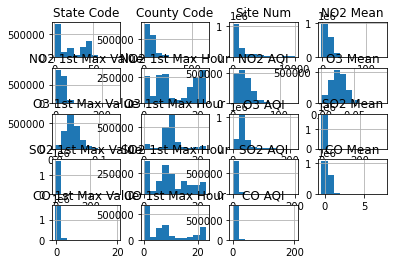

In [127]:
from matplotlib import pyplot
histogram=df.hist()
layout = 5,4
pyplot.show()

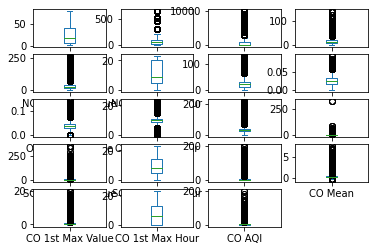

In [129]:
M=df.plot(kind='box',subplots=True,layout=(5,4),sharex=False,sharey=False)
layout = 5,5

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


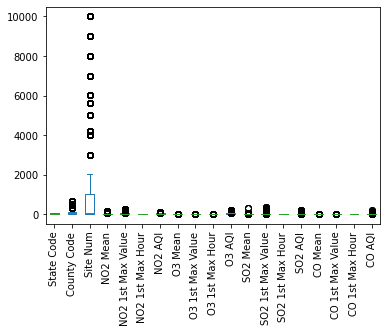

In [130]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=False,layout=(4,3),sharex=False,sharey=False)
layout = 5,8
plt.xticks(rotation = 90)
plt.show()

In [ ]:
K=df.plot(kind='density',subplots=True,layout=(5,4),sharex=False,sharey=False)
layout = 5,8